In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('df_with_userid_28_0ct.csv')

In [3]:
df = df.drop (df.columns[[0, 12]], axis=1)
df.head()

,profile_name,names,Id,brewerId,ABV,style,appearance,aroma,palate,taste,overall,time2,day,month,year,user_id
0,007,Fraoch Heather Ale,245,12142,5.0,Scottish Gruit / Ancient Herbed Ale,3.5,2.5,3.5,4.0,4.5,2008-09-04,4,9,2008,0
1,007,Saison Du BUFF,61351,345,6.8,Saison / Farmhouse Ale,4.0,3.5,4.5,3.5,4.5,2010-09-30,30,9,2010,0
2,007,HopDevil Ale,1005,345,6.7,American IPA,4.5,5.0,4.5,5.0,5.0,2010-10-12,12,10,2010,0
3,007,Helios (V Saison),47776,345,7.5,Saison / Farmhouse Ale,4.0,3.5,3.5,4.0,4.0,2010-12-08,8,12,2010,0
4,007,Victory Lager,1002,345,4.8,Munich Helles Lager,3.0,3.5,3.5,4.0,4.0,2010-10-27,27,10,2010,0


### we make a new column with values 1 (overall >= 4.0)  then we have the code to value good beers

In [4]:
def recode(row):
    if row['overall'] >=4.0:
        val = 1
    else:
        val = 0
    return val

In [5]:
df['rate_recode'] = df.apply (recode, axis=1)

In [6]:
df.sample(5)

,profile_name,names,Id,brewerId,ABV,style,appearance,aroma,palate,taste,overall,time2,day,month,year,user_id,rate_recode
1048209,hosehead83,Christian Moerlein Lager House Original Golde...,43881,10991,5.2,Munich Helles Lager,3.5,3.5,3.0,3.0,4.0,2009-10-18,18,10,2009,19743,1
147140,Chickenhawk9932,Newcastle Brown Ale,639,342,4.7,English Brown Ale,4.0,2.5,3.5,3.0,3.0,2011-07-31,31,7,2011,2598,0
198442,Donnie2112,Castle Eggenberg Urbock Dunkel Eisbock,7009,285,9.8,Eisbock,3.5,4.5,4.0,4.0,4.5,2008-07-18,18,7,2008,3555,1
327350,JRed,Namaste,53453,10099,5.0,Witbier,4.5,3.5,4.5,4.0,4.0,2011-08-21,21,8,2011,5843,1
1556732,yankeeheel,Gritty McDuff's Halloween Ale,6005,74,6.0,Extra Special / Strong Bitter (ESB),4.0,4.0,3.5,3.5,4.0,2003-09-13,13,9,2003,30426,1


In [7]:
df.groupby('profile_name')['Id'].nunique().sort_values(ascending = False).head(10)

profile_name
 northyorksammy    5776
 BuckeyeNation     4653
 mikesgroove       4559
 Thorpe429         3516
 womencantsail     3489
 ChainGangGuy      3467
 NeroFiddled       3457
 brentk56          3282
 Phyl21ca          3176
 WesWes            3163
Name: Id, dtype: int64

## ID

In [8]:
user_beers = df.groupby('profile_name')['Id'].count()
user_beers=user_beers.to_frame('num_rated_beers') 
user_beers.reset_index(inplace=True)
user_beers.head()

,profile_name,num_rated_beers
0,007,5
1,00766,2
2,01001111,5
3,0110x011,139
4,01121987,29


In [9]:
population=user_beers.groupby('num_rated_beers')['profile_name'].count().sort_values(ascending = False)
population=population.to_frame('num_users') 
population.reset_index(inplace=True)
population.columns = ['num_rated_beers', 'num_users']
population.head()

,num_rated_beers,num_users
0,1,10437
1,2,2702
2,3,2004
3,4,1340
4,5,1113


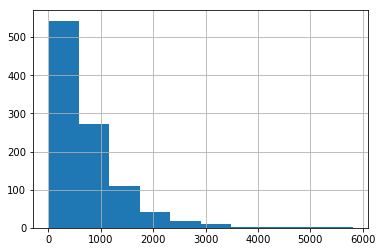

In [10]:
population.num_rated_beers.hist()

In [11]:
population2=population[(population.num_rated_beers >= 500) & (population.num_rated_beers <= 2500)]

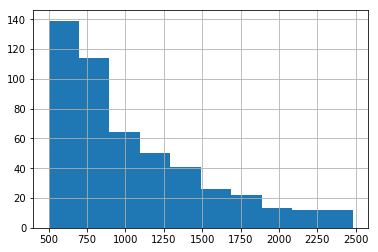

In [12]:
population2.num_rated_beers.hist()

### motivos: quitarnos outliers y despreciar usuarios por debajo de 500 birras porque tenemos sparsity a saco

In [13]:
df=pd.merge(df, user_beers, on='profile_name', how='outer')

In [14]:
df.head(2)

,profile_name,names,Id,brewerId,ABV,style,appearance,aroma,palate,taste,overall,time2,day,month,year,user_id,rate_recode,num_rated_beers
0,007,Fraoch Heather Ale,245,12142,5.0,Scottish Gruit / Ancient Herbed Ale,3.5,2.5,3.5,4.0,4.5,2008-09-04,4,9,2008,0,1,5
1,007,Saison Du BUFF,61351,345,6.8,Saison / Farmhouse Ale,4.0,3.5,4.5,3.5,4.5,2010-09-30,30,9,2010,0,1,5


In [15]:
df.shape

(1572759, 18)

### we recode user user ratings above 10 beers 

In [16]:
def recode2(row):
    if 500 <= row['num_rated_beers'] <=2500:
        val = 1
    else:
        val = 0
    return val

In [17]:
df['user_recode'] = df.apply (recode2, axis=1)

In [18]:
df.head(5)

,profile_name,names,Id,brewerId,ABV,style,appearance,aroma,palate,taste,overall,time2,day,month,year,user_id,rate_recode,num_rated_beers,user_recode
0,007,Fraoch Heather Ale,245,12142,5.0,Scottish Gruit / Ancient Herbed Ale,3.5,2.5,3.5,4.0,4.5,2008-09-04,4,9,2008,0,1,5,0
1,007,Saison Du BUFF,61351,345,6.8,Saison / Farmhouse Ale,4.0,3.5,4.5,3.5,4.5,2010-09-30,30,9,2010,0,1,5,0
2,007,HopDevil Ale,1005,345,6.7,American IPA,4.5,5.0,4.5,5.0,5.0,2010-10-12,12,10,2010,0,1,5,0
3,007,Helios (V Saison),47776,345,7.5,Saison / Farmhouse Ale,4.0,3.5,3.5,4.0,4.0,2010-12-08,8,12,2010,0,1,5,0
4,007,Victory Lager,1002,345,4.8,Munich Helles Lager,3.0,3.5,3.5,4.0,4.0,2010-10-27,27,10,2010,0,1,5,0


In [19]:
df1= df[(df.user_recode == 1) & (df.rate_recode == 1)]

In [20]:
df1.head()

,profile_name,names,Id,brewerId,ABV,style,appearance,aroma,palate,taste,overall,time2,day,month,year,user_id,rate_recode,num_rated_beers,user_recode
5728,ADR,Red God IPA,13816,14,9.0,American Double / Imperial IPA,4.0,4.5,4.0,4.5,4.0,2005-06-17,17,6,2005,255,1,1412,1
5729,ADR,Beantowne Espresso Stout,511,14,5.6,American Stout,4.0,4.0,4.0,4.5,4.0,2004-05-11,11,5,2004,255,1,1412,1
5730,ADR,Winter Ale,14879,14,99.0,Winter Warmer,4.0,3.5,4.0,4.0,4.0,2004-01-19,19,1,2004,255,1,1412,1
5731,ADR,Black Sheep Ale (Special),4904,1417,4.4,English Pale Ale,4.5,3.5,3.5,4.0,4.5,2003-09-29,29,9,2003,255,1,1412,1
5732,ADR,Riggwelter Yorkshire Ale,3939,1417,5.7,English Brown Ale,4.5,4.0,3.5,4.0,4.5,2003-12-08,8,12,2003,255,1,1412,1


In [21]:
df1[df1.num_rated_beers>2500]

,profile_name,names,Id,brewerId,ABV,style,appearance,aroma,palate,taste,overall,time2,day,month,year,user_id,rate_recode,num_rated_beers,user_recode


In [22]:
df1[df1.num_rated_beers<499]

,profile_name,names,Id,brewerId,ABV,style,appearance,aroma,palate,taste,overall,time2,day,month,year,user_id,rate_recode,num_rated_beers,user_recode


In [23]:
df1.shape

(396817, 19)

In [31]:
beers_rated_by_user = df1.groupby('Id')['profile_name'].count()
beers_rated_by_user=beers_rated_by_user.to_frame('beers_rated_by_user') 
beers_rated_by_user.reset_index(inplace=True)
beers_rated_by_user.head()

,Id,beers_rated_by_user
0,3,2
1,4,1
2,5,63
3,6,151
4,7,55


In [32]:
df=pd.merge(df1, beers_rated_by_user, on='Id', how='outer')

In [33]:
df.head()

,profile_name,names,Id,brewerId,ABV,style,appearance,aroma,palate,taste,overall,time2,day,month,year,user_id,rate_recode,num_rated_beers,user_recode,beers_rated_by_user
0,ADR,Red God IPA,13816,14,9.0,American Double / Imperial IPA,4.0,4.5,4.0,4.5,4.0,2005-06-17,17,6,2005,255,1,1412,1,10
1,BeerResearcher,Red God IPA,13816,14,9.0,American Double / Imperial IPA,4.5,4.5,4.0,4.0,4.0,2004-01-04,4,1,2004,1276,1,837,1,10
2,Georgiabeer,Red God IPA,13816,14,9.0,American Double / Imperial IPA,4.5,4.0,4.0,4.0,4.0,2008-08-08,8,8,2008,4586,1,2035,1,10
3,Hojaminbag,Red God IPA,13816,14,9.0,American Double / Imperial IPA,4.5,5.0,4.5,5.0,5.0,2008-05-03,3,5,2008,5189,1,1402,1,10
4,PatandDavid,Red God IPA,13816,14,9.0,American Double / Imperial IPA,4.0,4.5,4.0,4.5,5.0,2004-07-03,3,7,2004,8723,1,617,1,10


In [34]:
def recode_beers(row):
    if row['beers_rated_by_user'] >=40:
        val = 1
    else:
        val = 0
    return val

In [35]:
df['enough_beers_rated'] = df.apply (recode_beers, axis=1)

In [36]:
df= df[(df.beers_rated_by_user == 1)]

In [37]:
df.shape

(17276, 21)

In [38]:
df.to_csv('df_recommender_11_nov.csv')